In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [27]:
table = pd.read_excel("Loans_Data_2019.xlsx")
table["earliest_cr_line"] = table["earliest_cr_line"] - pd.Timestamp('1900-01-01')
table = pd.get_dummies(table, drop_first = True)

In [3]:
def get_status(x):
    """
    
    """
    return pd.DataFrame([x.median(), x.mad(), x.var(), x.std(), x.skew(), x.kurt()],
                        index=['median','mad','var','std','skew','kurt'])
get_status(table)

# 偏度大的可以考虑降偏度: log sqrt log1p

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,inq_last_6mths,total_pymnt,total_pymnt_inv,...,addr_state_SD,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,debt_settlement_flag_Y
median,1.110000e+04,1.100000e+04,1.050000e+04,0.126900,337.750000,5.500000e+04,14.650000,1.000000,1.126448e+04,1.112365e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
mad,6.287526e+03,5.863599e+03,5.683625e+03,0.031739,161.918331,2.591979e+04,5.389035,0.870107,6.852506e+03,6.649081e+03,...,0.003534,0.134601,0.003534,0.068290,0.003534,0.048330,0.027918,0.014059,0.003534,0.405983
var,6.156593e+07,5.380770e+07,5.133576e+07,0.001525,43659.980202,1.371539e+09,41.065026,1.799567,7.644012e+07,7.291620e+07,...,0.001770,0.067420,0.001770,0.034206,0.001770,0.024208,0.013984,0.007042,0.001770,0.203352
std,7.846396e+03,7.335373e+03,7.164898e+03,0.039057,208.949707,3.703429e+04,6.408200,1.341479,8.743004e+03,8.539098e+03,...,0.042070,0.259653,0.042070,0.184948,0.042070,0.155588,0.118252,0.083917,0.042070,0.450945
skew,9.334163e-01,9.105076e-01,9.109400e-01,0.113222,1.015040,2.273726e+00,-0.050117,3.629295,1.075425e+00,1.090009e+00,...,23.769729,3.304037,23.769729,5.041984,23.769729,6.130415,8.246224,11.789602,23.769729,0.965015
kurt,3.622301e-01,4.674896e-01,6.190286e-01,-0.569589,1.252632,8.016694e+00,-0.769692,25.537629,1.022997e+00,1.193511e+00,...,565.000000,8.948326,565.000000,23.504790,565.000000,35.708373,66.234660,137.481369,565.000000,-1.072556


In [4]:
corr = table.corr()
relevant_features = abs(corr['debt_settlement_flag_Y']).sort_values(ascending=False)[1:4]
relevant_features

loan_status_Fully Paid    0.753027
term_ 60 months           0.323152
total_rec_int             0.245000
Name: debt_settlement_flag_Y, dtype: float64

# 2

In [5]:
def sigmoid(x):
    return 1.0 / (1 + np.exp(-x))


def loss_logsit(x_test, t ,beta):
    
    X_test_add_one = np.column_stack((x_test, np.ones(len(x_test))))
    model_0 = sigmoid(np.dot(X_test_add_one, beta))
    loss_temp = t * np.log(model_0) + (1 - t) * np.log(1 - model_0) 
    return  -(np.sum(loss_temp) / len(x_test))


def myLogisticGD(X, t, beta, alpha, numIterations):
    
    X_add_one = np.column_stack((X,np.ones(len(X))))
    for i in range(0,numIterations):
        hypothesis = np.dot(X_add_one, beta)
        h = sigmoid(hypothesis)
        loss = h - t 
        cost = loss_logsit(X, t, beta)
        loss_total[i] = cost
#        print("Iteration %d | Cost: %f" % (i, cost))
        gradient = np.dot(X_add_one.transpose(), loss) / len(X)
        beta = beta - alpha * gradient
        beta_total[i,:]= beta.transpose()
    return beta

def show_loss_and_beta(loss_total,beta_total,alpha):
    
    fig1 = plt.figure()
    plt.plot(loss_total, label = "Loss fucntion")
#     plt.plot(beta_total[:,0], label = "Beta0")
#     plt.plot(beta_total[:,1], label = "Beta1")
#     plt.plot(beta_total[:,2], label = "Beta2")
#     plt.plot(beta_total[:,3], label = "Beta3")
#     plt.plot(beta_total[:,4], label = "Beta4")
    plt.legend(loc="upper right")
    plt.xlabel("Number of iteration")
    title = "Alpha: " + str(alpha)
    plt.title(title)
    plt.show()

In [6]:
from sklearn import preprocessing

loans_data = pd.read_excel("Loans_Data_2019.xlsx")



In [30]:
c = pd.Series(preprocessing.scale( loans_data['annual_inc']) )
d = pd.Series(preprocessing.scale( loans_data['installment']) )
e = pd.Series(preprocessing.scale( loans_data['loan_amnt']) )
X_loans = pd.DataFrame((c,d,e,loans_data['int_rate'])).transpose()



In [28]:
# features = ['loan_amnt', 'annual_inc', 'int_rate', 'installment']

# scale = lambda x: preprocessing.scale(x)
# X_loans = loans_data[features]
# X_loans = scale(x_loansS)
# x_loansS

array([[-0.64283459,  0.16241463,  0.83275833, -0.84149694],
       [-0.99362454, -0.56728544,  0.80969469, -0.89428363],
       [ 2.80128498,  0.97319248,  2.33445739,  2.88039641],
       ...,
       [-0.94897855,  0.56780355,  0.36123507, -0.85811852],
       [-1.09248353, -0.5489078 ,  0.52011791, -1.03750707],
       [ 0.88788522, -0.43756098, -0.39217709, -0.42849611]])

In [8]:
t_loans = pd.get_dummies(loans_data['debt_settlement_flag'],drop_first=True).iloc[:,0]

init_beta = [0.0, 0.0, 0.0, 0.0, 0.0]

#alpha = 0.005

numIterations = 4000

loss_total= np.zeros((numIterations,1))
beta_total= np.zeros((numIterations,5))



[ 0.02628523  0.02261174  0.03595257 -0.00935374 -0.08247358]


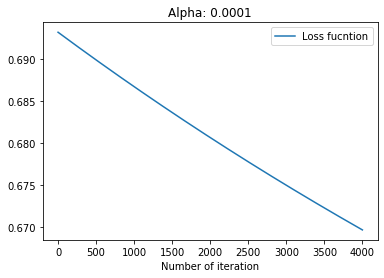

[ 0.06554613  0.05139552  0.09074309 -0.02525169 -0.22448464]


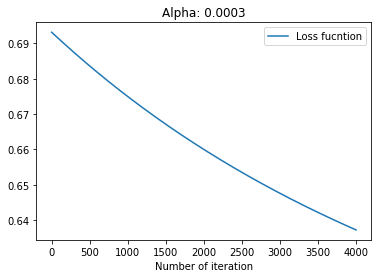

[ 0.13110552  0.0683677   0.19331311 -0.05965024 -0.55202144]


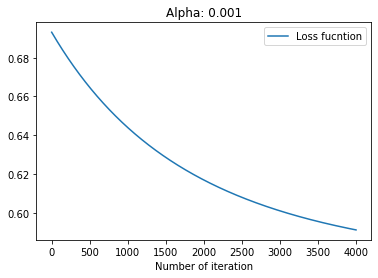

[ 0.17237313 -0.0137669   0.3251863  -0.07862439 -0.87115744]


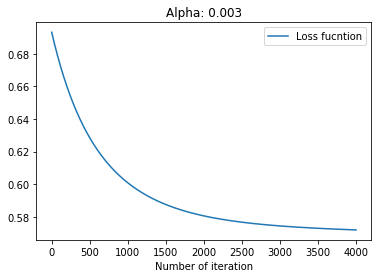

[ 0.17091621 -0.26516574  0.58933006 -0.01471732 -0.96253396]


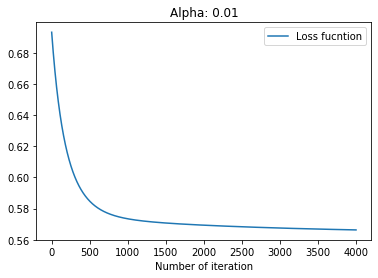

[ 0.15694926 -0.52601174  0.85503182  0.17712622 -0.99344053]


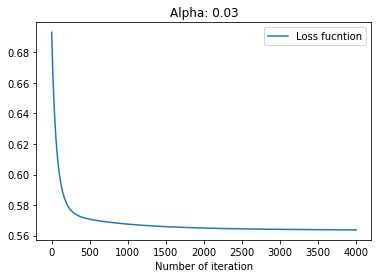

[ 0.15433597 -0.58546526  0.90801626  0.78894686 -1.07640613]


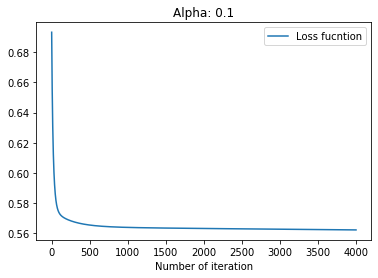

[ 0.15571878 -0.56523894  0.86723363  2.31727364 -1.28084967]


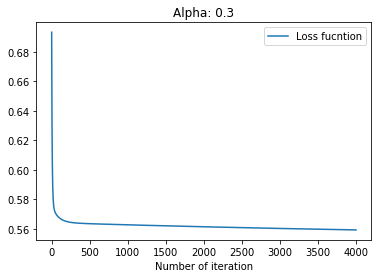

In [9]:
alphas = [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3]

for alpha in alphas:
    beta = myLogisticGD(X_loans,t_loans,init_beta,alpha,numIterations)
    print(beta)
    show_loss_and_beta(loss_total,beta_total,alpha)

# 3

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_sklearn =  table[['loan_status_Fully Paid','term_ 60 months','total_rec_int']]
y_sklearn = table['debt_settlement_flag_Y']

X_log_train, X_log_test, y_log_train, y_log_test = train_test_split(X_sklearn, y_sklearn, test_size=0.2, random_state=0)
clf = LogisticRegression(random_state=0, fit_intercept=True)
clf.fit(X_sklearn,y_sklearn)
y_log_estimate = clf.predict(X_log_test)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [12]:
clf.intercept_

array([0.10122242])

In [13]:
clf.coef_

array([[-4.80080243e+00,  3.39212225e-01,  1.37615002e-04]])

In [14]:
beta = np.append(clf.coef_, clf.intercept_)
loss_logsit(X_log_test, y_log_test, beta)

0.28889114305160407